In [4]:
import os
import sys

import awkward as ak
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import numpy as np
import seaborn as sns

sys.path.append(os.path.abspath('../'))

from source.data import opendata

sns.set_theme()

font_path = '/usr/share/fonts/truetype/msttcorefonts/Times_New_Roman.ttf'  # Replace with the actual path
font_properties = FontProperties(fname=font_path, size=12)

In [5]:
def draw_jet_eflow_distribution(
        title: str,
        event_list: list[ak.Array],
        channel_list: list[str],
        pt_threshold: float,
        feature: str,
        bins: int,
        ax: plt.Axes,
    ):
    """Draw distribution of jet energy flow information.
    
    Args:
        row_ax : Axes object
            One of the row of 2D axes object.
        feature : str
            The feature of jet to be drawed (pt, eta, or phi).
        bins : int
            Number of bins of the histogram.
    """
    
    # Will determine the range for y-axis depending on the feature values.
    yrange = [0, 0]
    
    for i in range(len(channel_list)):
        # One of the channel events.
        events = event_list[i]

        # `plt` needs to convert `ak.Array` to `np.array`
        data = ak.to_numpy(events[feature])

        # The 0-th column plots the total overlapped histogram.
        pdf, _, _ = ax.hist(
            x=data,
            bins=bins,
            label=channel_list[i],
            alpha=0.6,
            # density=True,
        )

        # Update the values for y_range such that the scale for each channel is
        # the same.
        yrange[1] = max(yrange[1], max(pdf))
    
    # Rescale the `yrange` value a bit more higher.
    yrange[1] *= 1.1

    for i in range(len(channel_list)):
        # Altogether column.
        # ax.set_title('Histogram of # of ptcs in fat-jets (pt_rel > 0.025)')
        if pt_threshold != 0:
            ax.set_xticks([2, 6, 10, 14, 18, 22])
        ax.set_title(title)
        ax.set_xlabel(f"Number of particles in jets")
        ax.set_ylabel(f"Number of events")
        ax.legend()

Loading Top Quark dataset from mode: train, is_signal_new: 1
Loading Top Quark dataset from mode: train, is_signal_new: 0
Loading Top Quark dataset from mode: train, is_signal_new: 1
Loading Top Quark dataset from mode: train, is_signal_new: 0
Loading JetNet dataset from channel: g
Loading JetNet dataset from channel: q
Loading JetNet dataset from channel: t
Loading JetNet dataset from channel: w
Loading JetNet dataset from channel: z
Loading JetNet dataset from channel: g
Loading JetNet dataset from channel: q
Loading JetNet dataset from channel: t
Loading JetNet dataset from channel: w
Loading JetNet dataset from channel: z


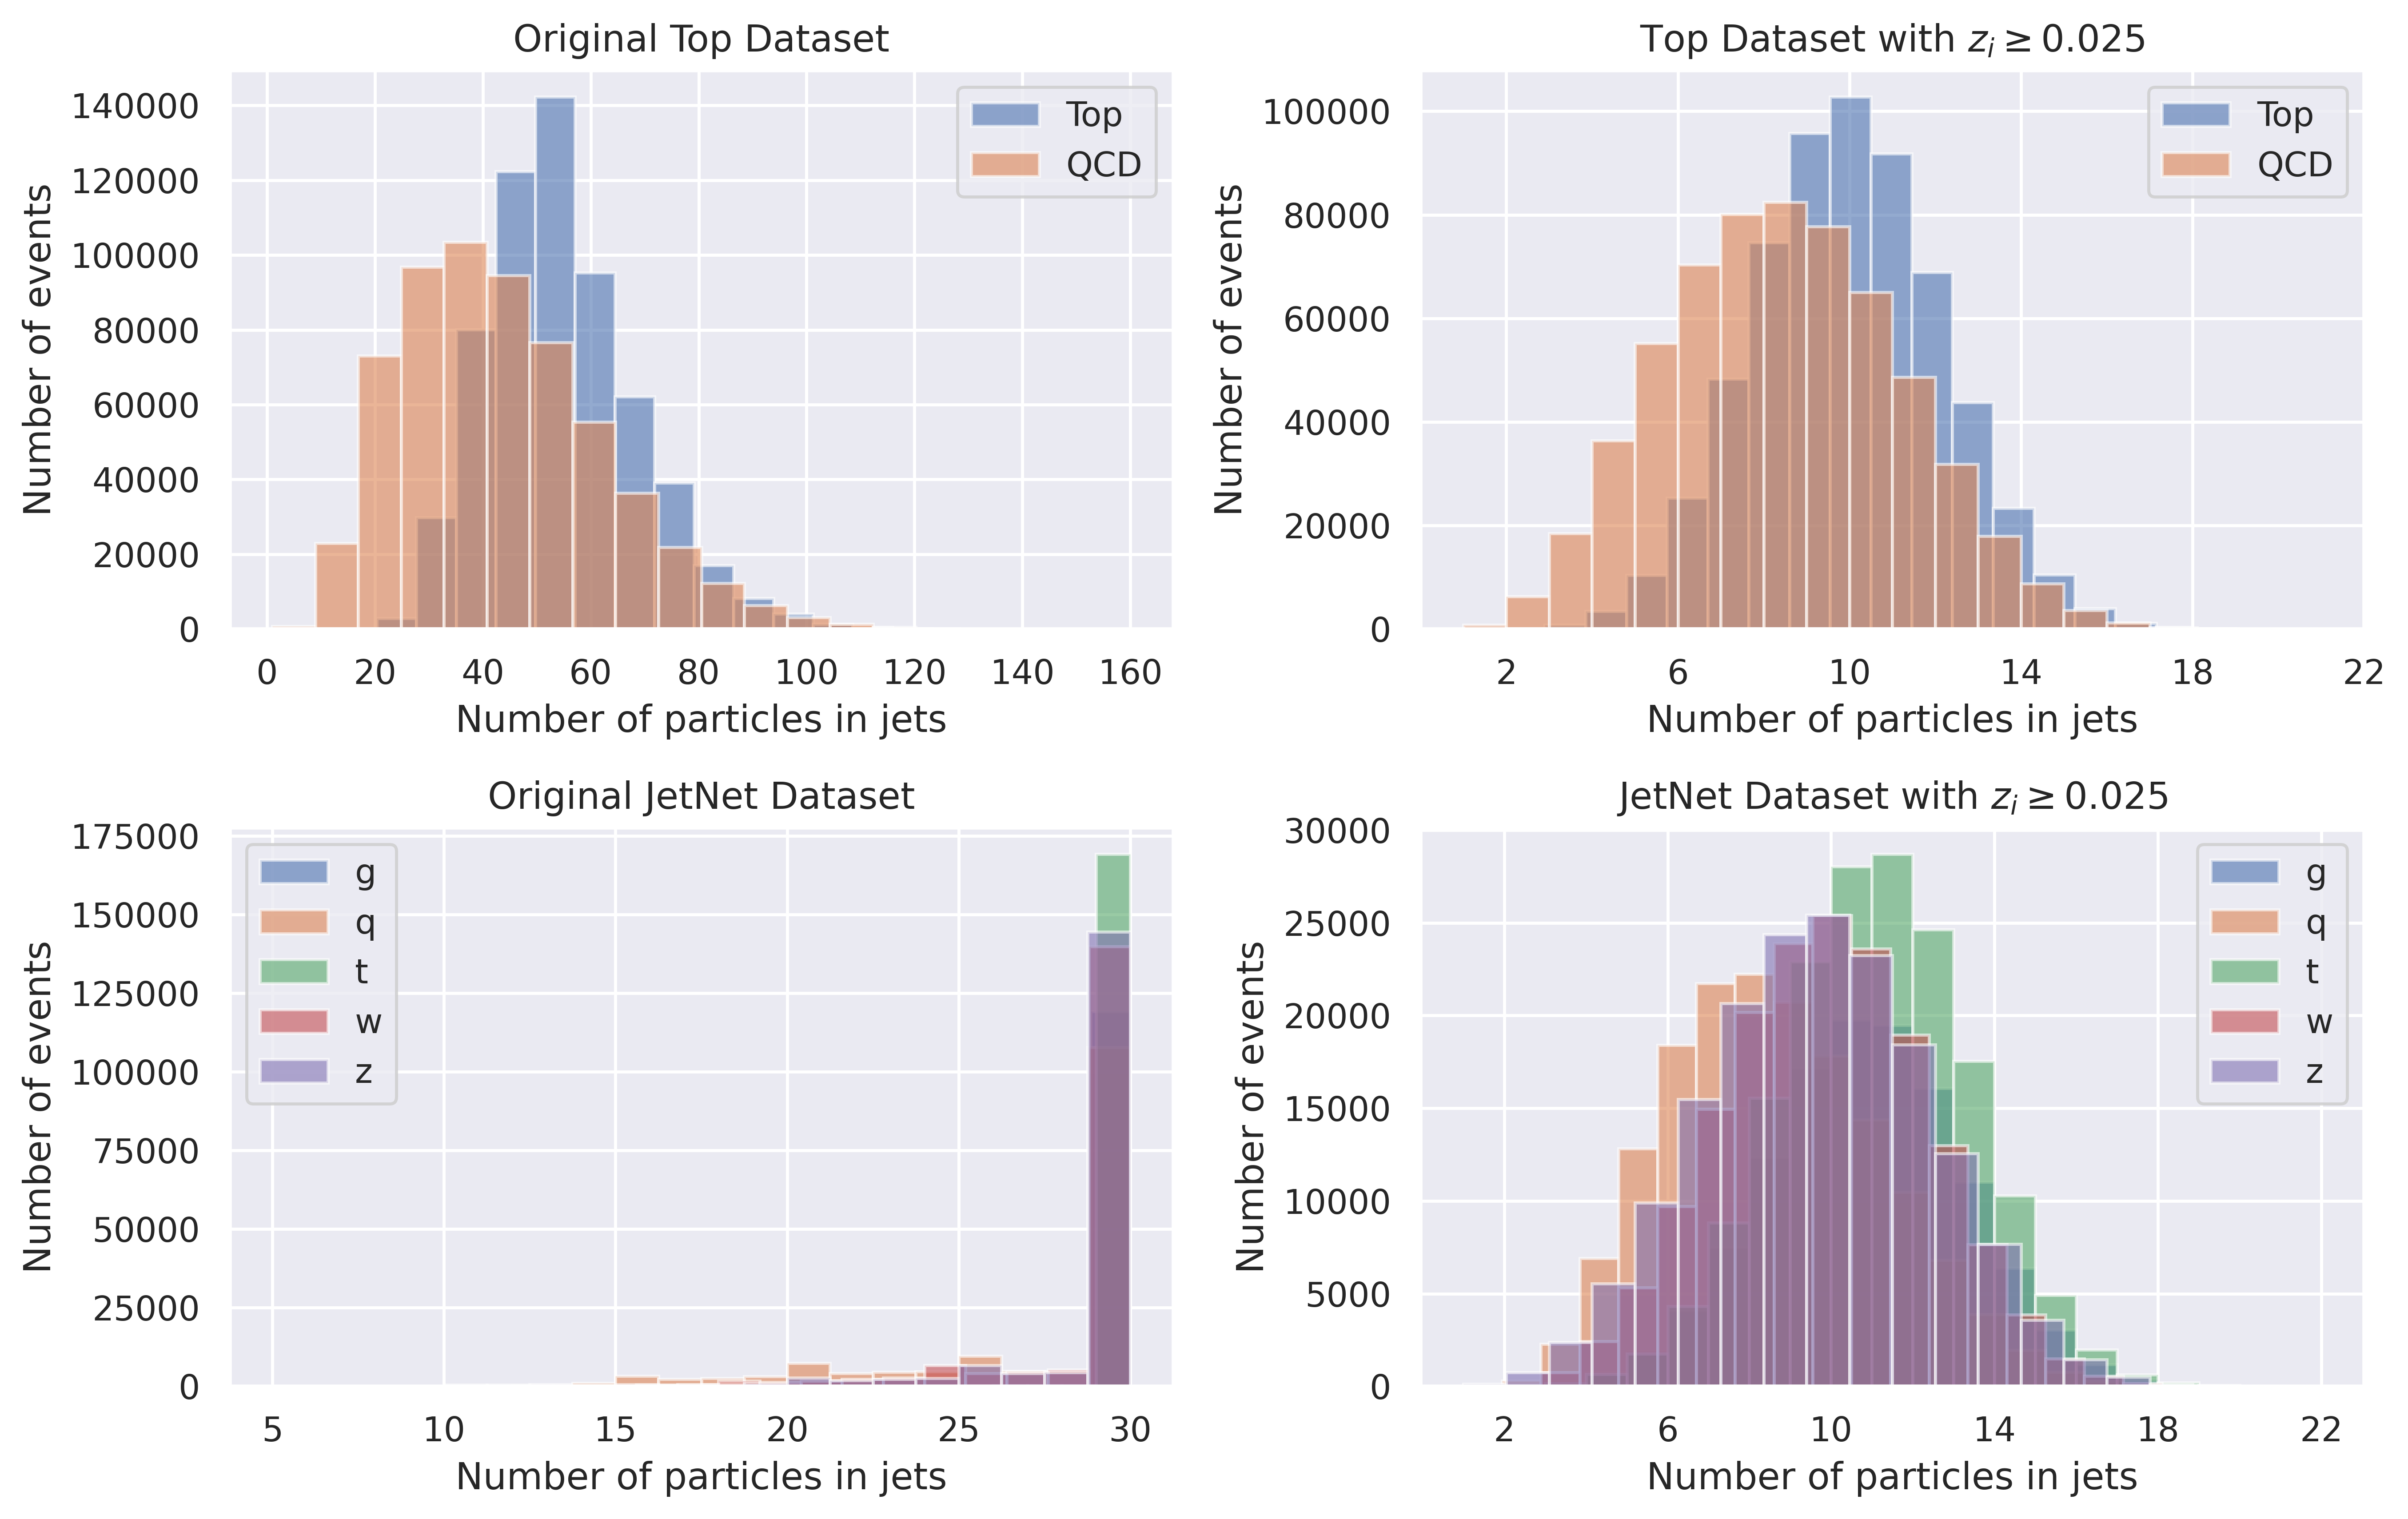

In [6]:
fig, ax = plt.subplots(2, 2, figsize=(11, 7), dpi=500)

draw_jet_eflow_distribution(
    title='Original Top Dataset',
    event_list=[
        opendata.TopQuarkEvents(mode='train', is_signal_new=1, pt_threshold=0, pt_min=550, pt_max=650).events,
        opendata.TopQuarkEvents(mode='train', is_signal_new=0, pt_threshold=0, pt_min=550, pt_max=650).events,
    ],
    channel_list=['Top', 'QCD'],
    pt_threshold=0,
    feature='fatjet_num_ptcs',
    bins=20,
    ax=ax[0][0],
)

draw_jet_eflow_distribution(
    title=r'Top Dataset with $z_i \geq 0.025$',
    event_list=[
        opendata.TopQuarkEvents(mode='train', is_signal_new=1, pt_threshold=0.025, pt_min=550, pt_max=650).events,
        opendata.TopQuarkEvents(mode='train', is_signal_new=0, pt_threshold=0.025, pt_min=550, pt_max=650).events,
    ],
    channel_list=['Top', 'QCD'],
    pt_threshold=0.025,
    feature='fatjet_num_ptcs',
    bins=20,
    ax=ax[0][1],
)

draw_jet_eflow_distribution(
    title='Original JetNet Dataset',
    event_list=[opendata.JetNetEvents(channel, pt_threshold=0, pt_min=800, pt_max=1200).events for channel in ['g', 'q', 't', 'w', 'z']],
    channel_list=['g', 'q', 't', 'w', 'z'],
    pt_threshold=0,
    feature='fatjet_num_ptcs',
    bins=20,
    ax=ax[1][0],
)

draw_jet_eflow_distribution(
    title=r'JetNet Dataset with $z_i \geq 0.025$',
    event_list=[opendata.JetNetEvents(channel, pt_threshold=0.025, pt_min=800, pt_max=1200).events for channel in ['g', 'q', 't', 'w', 'z']],
    channel_list=['g', 'q', 't', 'w', 'z'],
    pt_threshold=0.025,
    feature='fatjet_num_ptcs',
    bins=20,
    ax=ax[1][1],
)

plt.tight_layout()